In [3]:
#Proceso de importación de Referencias


# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asignamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear gráficas y mostrar las imágenes en pantalla

from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes
from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes
from skimage import morphology           # Para crear el kernel de convolución en los filtros no lienales
from skimage import transform            # Esta biblioteca es la que contiene la implementación de Hough
from skimage import measure              # Esta biblioteca contiene el método de etiquetado de regiones
from skimage import feature              # Esta biblioteca es la que contiene la implementación del canny

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución
import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización
import os
###########################

from scipy.stats import kde              # Esta biblioteca es necesaria para estimar la función de densidad de los datos
from sklearn import preprocessing        # Este paquete contiene las funciones de preprocesamiento de datos
from sklearn import feature_selection    # Este paquete contiene los métodos de selección de características de sklearn
from sklearn import svm                  # Este paquete contiene las funciones de un clasificador SVM
from sklearn import model_selection      # Este paquete contiene las funciones de particionamiento de datos y validación cruzada
from sklearn import metrics              # Este paquete contiene las funciones para evaluar un clasificador

# Con este nos aseguramos que las imágenes en niveles de gris, se vean como tal siempre.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

In [4]:
sq = morphology.square(width=3)
dia = morphology.diamond(radius=1)
rd = morphology.disk(radius=4)

In [60]:
#Proceso para la base de datos

#Metodo que segmenta cada imagen 
def segmentacionImage(img):    
    img_1 = img.copy()
    img_1 = img_1[..., 0]
    k = morphology.square(10)
    img_median = filters.rank.median(img_1, k)
    img_min = filters.rank.minimum(img_median, k)
    
    gradiente = filters.sobel(img_min)
    imgfloat = skimage.img_as_float(gradiente)
    img_tatto = gradiente > 0.03
    return img_1,img_tatto

def showFilesSeg(array):
    #f, axes = plt.subplots(ncols=4, nrows=len(array), figsize=(10, 30))   
    ImgCutArray = None
        
    for i,image in enumerate(array):
        imageR,img_seg = segmentacionImage(image)       
        img_dilatada = morphology.dilation(img_seg, sq)        
        f1 = measure.label(img_dilatada)
        imgCut = CutImage(f1,f1)
        xobject = np.array([imgCut,"vannesa"])
        skdemo.imshow_all(f1,imgCut)
        if ImgCutArray is None:
            ImgCutArray = xobject.copy()
        else:
            #ImgCutArray.append([xobject],axis=0)
            
            ImgCutArray = np.vstack((ImgCutArray, xobject))
    
    return ImgCutArray
        
def showFilesSegV2(folder):
    array = io.ImageCollection('imagenes/'+folder+'/*.jpg')
    #f, axes = plt.subplots(ncols=4, nrows=len(array), figsize=(10, 30))   
    ImgCutArray = None        
    for i,image in enumerate(array):
        imageR,img_seg = segmentacionImage(image)       
        img_dilatada = morphology.dilation(img_seg, sq)        
        f1 = measure.label(img_dilatada)
        imgCut = CutImage(f1,f1)
        props = measure.regionprops(imgCut)
        y_iter = chain(props)
        for obj in y_iter:
            X_obj = np.array([
                obj.area,
                obj.perimeter,
                obj.solidity,        
                obj.eccentricity,
                obj.centroid[0],
                obj.centroid[1],
                obj.equivalent_diameter,
                obj.major_axis_length,
                obj.minor_axis_length,
                obj.moments_hu[0],
                obj.moments_hu[1],
                obj.moments_hu[2],
                obj.moments_hu[3],
                obj.moments_hu[4],
                obj.moments_hu[5],
                obj.moments_hu[6]
            ])

            if ImgCutArray is None:
                ImgCutArray = X_obj.copy()
            else: 
                ImgCutArray = np.vstack((ImgCutArray, X_obj))                    
    return ImgCutArray    
        
def CutImage(imgOri,img):
    props = measure.regionprops(img)
    areas = [r.area for r in props]
    largest_ind = np.argmax(areas)

    x1= props[largest_ind].bbox[0]
    x2= props[largest_ind].bbox[2]
    y1= props[largest_ind].bbox[1]
    y2= props[largest_ind].bbox[3]


    img_cut = imgOri[x1:x2,y1:y2].copy()
    return img_cut
    #plt.imshow(img_cut, cmap='gray')
    #skdemo.imshow_all(img_3,img_cut)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0

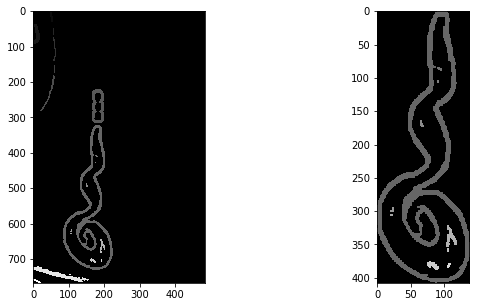

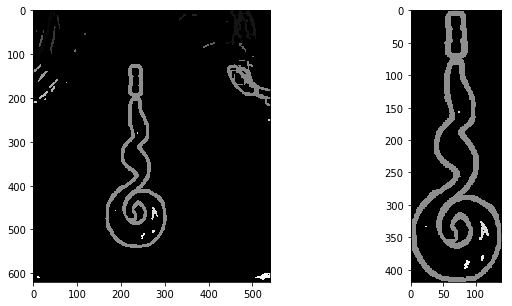

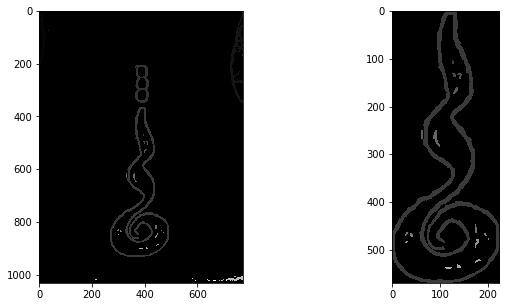

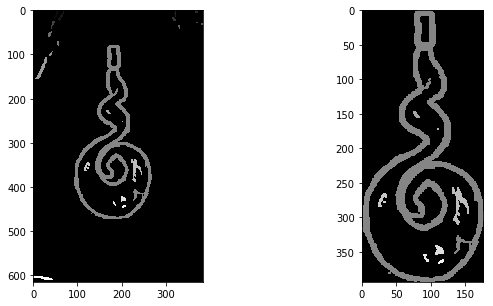

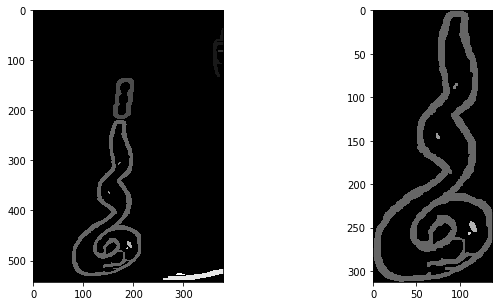

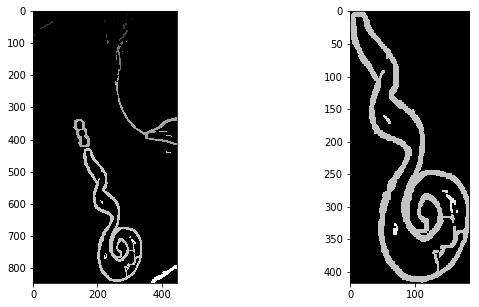

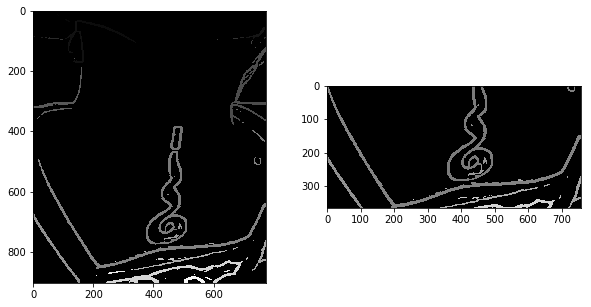

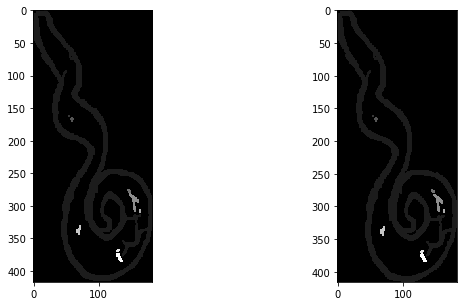

In [45]:
arrayV = showFilesSeg(vannesaTattoos)
arrayV = np.ravel(arrayV)
print(arrayV)


In [ ]:
for i,image in enumerate(arrayV):
    plt.imshow(image, cmap='jet')

In [ ]:
#Proceso individual de imagenes

img_orginal = skimage.img_as_float(io.imread("imagenes/vannesa/v4.jpg"))
skdemo.imshow_all(img_orginal[..., 0], img_orginal[..., 1], img_orginal[..., 2],
                 titles=['R', 'G', 'B'])


img_3 = img_orginal[..., 0].copy()
skdemo.imshow_with_histogram(img_3)

In [ ]:
k = morphology.square(10)
img_median = filters.rank.median(img_3, k)
skdemo.imshow_all(img_3,img_median)
img_min = filters.rank.minimum(img_median, k)
skdemo.imshow_all(img_3,img_min)

In [ ]:
gradiente = filters.sobel(img_min)
imgfloat = skimage.img_as_float(gradiente)
skdemo.imshow_with_histogram(imgfloat)

In [ ]:
img_tatto = gradiente > 0.03
plt.imshow(img_tatto, cmap='gray')

In [ ]:
img_dilatada = morphology.dilation(img_tatto, sq)
skdemo.imshow_all(img_tatto, img_dilatada)
#img_tatto = img_dilatada

In [ ]:
etiqueta = measure.label(img_dilatada)
plt.imshow(etiqueta, cmap="jet")

In [ ]:
props = measure.regionprops(etiqueta)

areas = [r.area for r in props]
print(areas)
largest_ind = np.argmax(areas)
print(largest_ind)

x1= props[largest_ind].bbox[0]
x2= props[largest_ind].bbox[2]
y1= props[largest_ind].bbox[1]
y2= props[largest_ind].bbox[3]


img_cut = etiqueta[x1:x2,y1:y2].copy()

img_cut_etiqueta = measure.label(img_cut)
plt.imshow(img_cut_etiqueta, cmap="jet")
#plt.imshow(img_cut, cmap='gray')
#skdemo.imshow_all(img_3,img_cut)

In [37]:
y = np.vstack(["Vannesa","Mena","Carmelina","Faustino"])
y = np.ravel(y)
print(y)

['Vannesa' 'Mena' 'Carmelina' 'Faustino']


In [61]:
from itertools import chain
X = None

for obj in y:
    arrayV = showFilesSegV2(obj)
    #arrayV = np.ravel(arrayV)
    if X is None:
        X = arrayV.copy()
    else:
        X = np.vstack((X, arrayV))
    

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [62]:
#Se aplica la función para escalar los datos
scaler = preprocessing.MinMaxScaler()
X_scl = scaler.fit_transform(X)

In [47]:
X = None

# Lo que debemos hacer es recorrer cada objeto e ir concatenado las características de estos
for obj in y:
    arrayV = showFilesSegV2(obj)
    X_obj = np.array([
                obj.area,
                obj.perimeter,
                obj.solidity,        
                obj.eccentricity,
                obj.centroid[0],
                obj.centroid[1],
                obj.equivalent_diameter,
                obj.major_axis_length,
                obj.minor_axis_length,
                obj.moments_hu[0],
                obj.moments_hu[1],
                obj.moments_hu[2],
                obj.moments_hu[3],
                obj.moments_hu[4],
                obj.moments_hu[5],
                obj.moments_hu[6]
    ])
    
    #Agregamos las características del objeto a la matriz X
    if X is None:
        X = X_obj.copy()
    else:
        X = np.vstack((X, X_obj))

        print(X)


[[list([<skimage.measure._regionprops._RegionProperties object at 0x0000014F701EC8D0>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F7023A160>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F7023A128>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F7025DD68>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB6F98>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB66A0>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB6CC0>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB66D8>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB6D68>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB6400>])
  'Vannesa']
 [list([<skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB6470>, <skimage.measure._regionprops._RegionProperties object at 0x0000014F6FCB6BE0>, <skimage.measure._regi

ValueError: setting an array element with a sequence.

In [ ]:
# Creamos la matriz de datos vacía
X = None

# Lo que debemos hacer es recorrer cada objeto e ir concatenado las características de estos
for obj in y:
    
    X_obj = np.array([
                obj.area,
                obj.perimeter,
                obj.solidity,        
                obj.eccentricity,
                obj.centroid[0],
                obj.centroid[1],
                obj.equivalent_diameter,
                obj.major_axis_length,
                obj.minor_axis_length,
                obj.moments_hu[0],
                obj.moments_hu[1],
                obj.moments_hu[2],
                obj.moments_hu[3],
                obj.moments_hu[4],
                obj.moments_hu[5],
                obj.moments_hu[6]
    ])
    
    #Agregamos las características del objeto a la matriz X
    if X is None:
        X = X_obj.copy()
    else:
        X = np.vstack((X, X_obj))

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
 'vannesa'
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0

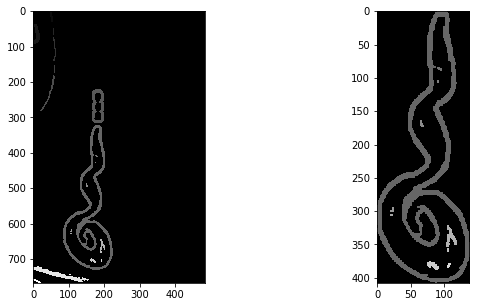

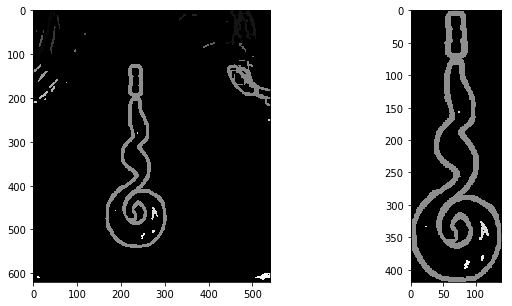

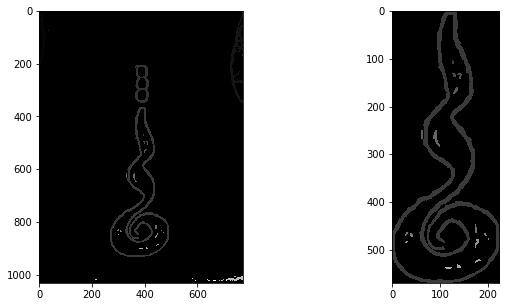

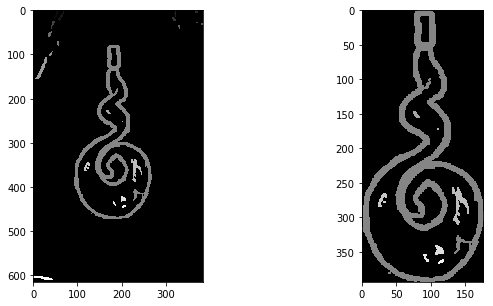

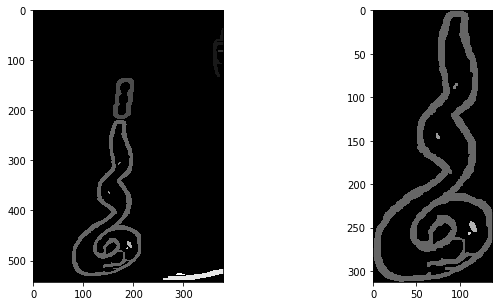

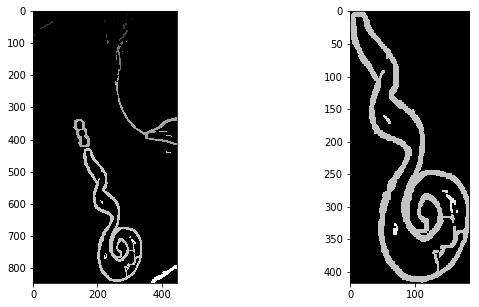

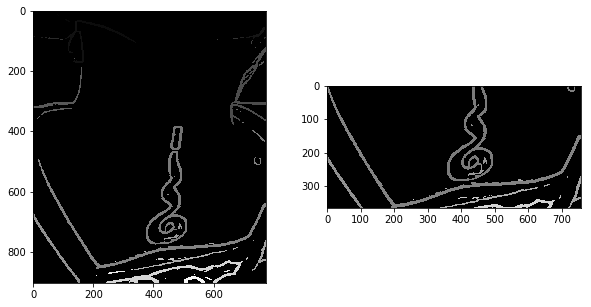

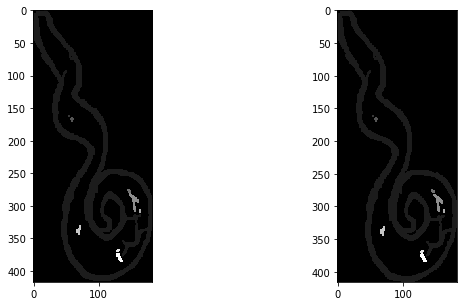

In [65]:
vannesaTattoos = io.ImageCollection('imagenes/vannesa/*.jpg')
arrayV = showFilesSeg(vannesaTattoos)
arrayV = np.ravel(arrayV)
print(arrayV)

array([[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
        'vannesa'],
       [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
        'vannesa']], dtype=object)

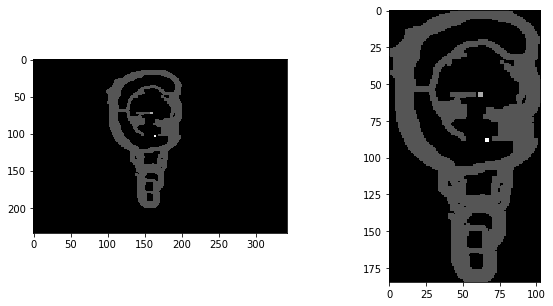

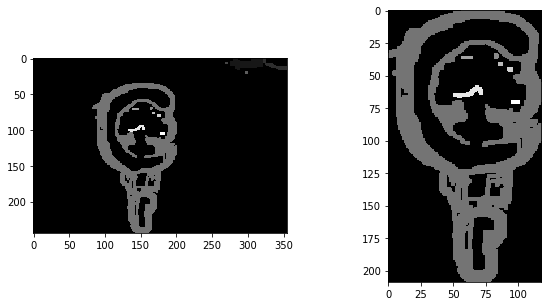

In [64]:
carmelinaTattoos = io.ImageCollection('imagenes/carmelina/*.jpg')
showFilesSeg(carmelinaTattoos)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


array([[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 106, 106,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64),
        'vannesa'],
       [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
        'vannesa']], dtype=object)

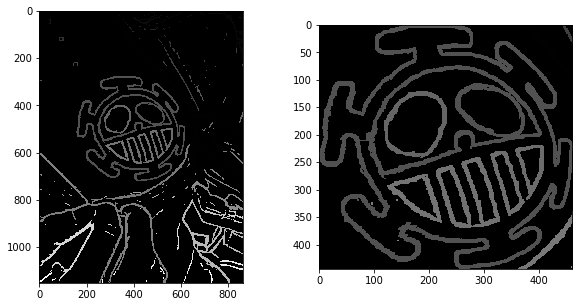

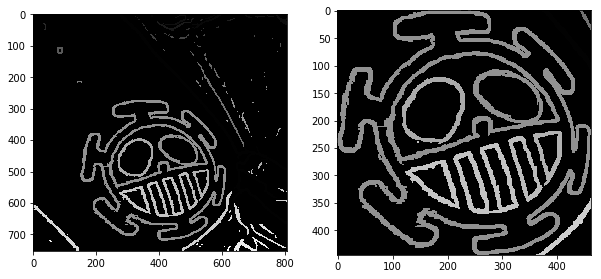

In [63]:
MenaTattoos = io.ImageCollection('imagenes/Mena/*.jpg')
showFilesSeg(MenaTattoos)

In [ ]:
faustinoTattoos = io.ImageCollection('imagenes/faustino/*.jpg')
showFilesSeg(faustinoTattoos)

In [ ]:
carlosTattoos = io.ImageCollection('imagenes/carlos/*.jpg')
showFilesSeg(carlosTattoos)